In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
# Load dataset
df = pd.read_csv('gym_membership.csv') 

# Remove low-priority columns
df.drop(columns=['id','birthday','fav_group_lesson','fav_drink','name_personal_trainer',
                 'avg_time_check_in','avg_time_check_out', 'days_per_week'], inplace=True) 

# Rename columns for data clarity and consistency
df.rename(columns={'abonoment_type':'membership_level','drink_abo':'uses_cafe','Age':'age',
                   'visit_per_week':'visits_per_week','personal_training':'uses_personal_training',
                   'avg_time_in_gym':'avg_session_time_min'}, inplace=True)  

# Show updated dataset
df.head()

,gender,age,membership_level,visits_per_week,attend_group_lesson,avg_session_time_min,uses_cafe,uses_personal_training,uses_sauna
0,Female,27,Premium,4,True,116,False,False,True
1,Female,47,Standard,3,False,48,False,True,False
2,Male,41,Premium,1,True,123,True,True,False
3,Male,44,Premium,3,False,99,True,True,True
4,Male,44,Standard,2,True,50,False,True,False


In [40]:
# Make the dataset numerical

# Use LabelEncoder() to convert column types to int64
label = LabelEncoder() 

# Use label.fit_transform on all columns not already converted to int64
df['gender']=label.fit_transform(df['gender'])
df['membership_level']=label.fit_transform(df['membership_level'])
df['attend_group_lesson']=label.fit_transform(df['attend_group_lesson'])
df['uses_cafe']=label.fit_transform(df['uses_cafe'])
df['uses_personal_training']=label.fit_transform(df['uses_personal_training'])
df['uses_sauna']=label.fit_transform(df['uses_sauna'])

# Show updated dataset
df.head() 

,gender,age,membership_level,visits_per_week,attend_group_lesson,avg_session_time_min,uses_cafe,uses_personal_training,uses_sauna
0,0,27,0,4,1,116,0,0,1
1,0,47,1,3,0,48,0,1,0
2,1,41,0,1,1,123,1,1,0
3,1,44,0,3,0,99,1,1,1
4,1,44,1,2,1,50,0,1,0


In [41]:
# Print data type of each column to ensure all columns are numerical and ready for analysis
df.dtypes

gender                    int64
age                       int64
membership_level          int64
visits_per_week           int64
attend_group_lesson       int64
avg_session_time_min      int64
uses_cafe                 int64
uses_personal_training    int64
uses_sauna                int64
dtype: object

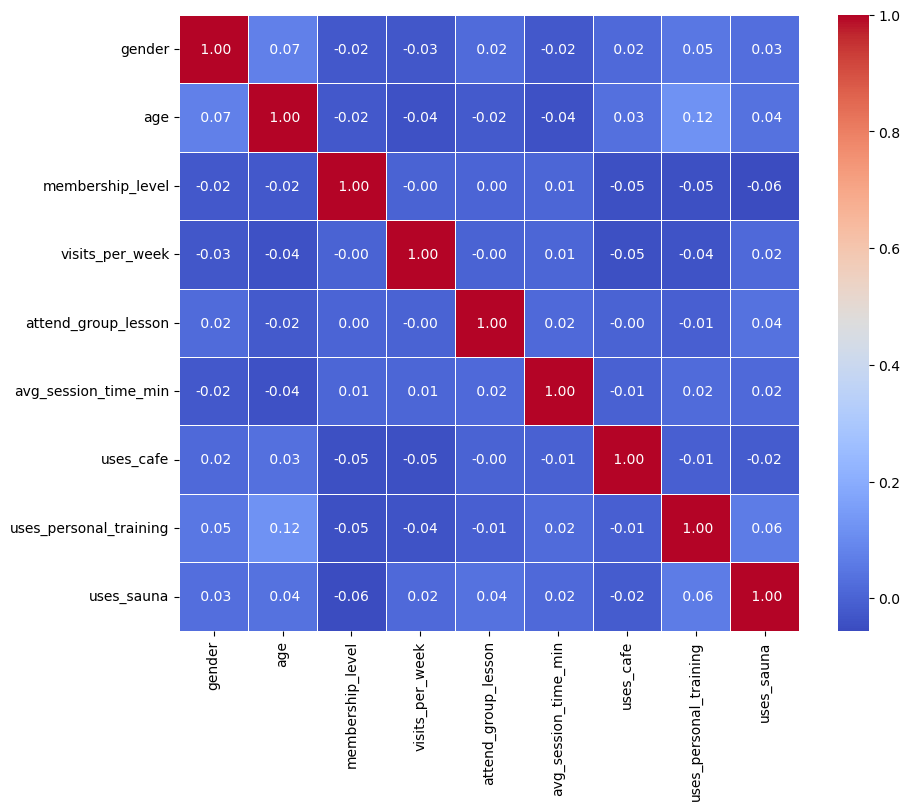

In [42]:
# Create an inputs list of all column names for correlation matrix
inputs = ['gender','age','membership_level','visits_per_week','attend_group_lesson','avg_session_time_min',
          'uses_cafe','uses_personal_training','uses_sauna']

# Calculate the correlation matrix for the input features
correlation = df[inputs].corr()

# Create and display heatmap of the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True, cmap='coolwarm',fmt=' .2f',linewidth=0.5)
plt.show()

In [43]:
# Select features from df for prediction model
X = df[['gender','age','visits_per_week','attend_group_lesson','avg_session_time_min','uses_cafe',
        'uses_personal_training','uses_sauna']]

# Select the target variable 
Y = df['membership_level']

# Split dataset into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [44]:
# Create the Logistic Regression model
model = LogisticRegression()

# Train the model using the training data
model.fit(X_train, Y_train)

# Use the model to calculate predictions using the test data
y_predict = model.predict(X_test)

In [45]:
# Calculate the accuracy score 
accuracy = accuracy_score(Y_test, y_predict)

# Print Accuracy Score
print(f'Prediction Model Accuracy Score: {accuracy}')

Prediction Model Accuracy Score: 0.52


In [46]:
# Gather user inputs for member info to prepare data for prediction model
print("PREDICT MEMBERSHIP LEVEL")

# Gather the user response for each input
gender = int(input("Enter the member's gender (0 = Male, 1 = Female): "))
age = int(input("Enter the member's age: "))
visits_per_week = int(input("Enter how many days the member would visit the gym per week (1-7): "))
attend_group_lesson = int(input("Enter if the member would take advantage of group lessons (0 = No, 1 = Yes): "))
avg_session_time_min = int(input("Enter the avg time the member would spend in the gym per day (in minutes): "))
uses_cafe = int(input("Enter if the member would purchase items from the cafe (0 = No, 1 = Yes): "))
uses_personal_training = int(input("Enter if the member would register for personal training (0 = No, 1 = Yes): "))
uses_sauna = int(input("Enter if the member would use the gym sauna (0 = No, 1 = Yes): "))

# Print user inputs for GitHub view
print(f'''USER INPUTS:
gender: {gender}
age: {age}
visits_per_week: {visits_per_week}
attend_group_lesson: {attend_group_lesson}
avg_session_time_min: {avg_session_time_min}
uses_cafe: {uses_cafe}
uses_personal_training: {uses_personal_training}
uses_sauna: {uses_sauna}''')

# Put inputs into an array so it can be read by the prediction model
new_member_info = np.array([[gender,age,visits_per_week,attend_group_lesson,avg_session_time_min,uses_cafe,uses_personal_training,uses_sauna]]) 

# Use trained model to predict membership level for new member
predicted_membership = model.predict(new_member_info)

# Catogorize membership level based on binary result (0 or 1) 
membership_level = 'PREMIUM MEMBERSHIP' if predicted_membership == 1 else 'STANDARD MEMBERSHIP'

# Display prediction
print(f'Member would likely purchase a {membership_level}')

PREDICT MEMBERSHIP LEVEL


Enter the member's gender (0 = Male, 1 = Female):  0
Enter the member's age:  21
Enter how many days the member would visit the gym per week (1-7):  6
Enter if the member would take advantage of group lessons (0 = No, 1 = Yes):  0
Enter the avg time the member would spend in the gym per day (in minutes):  45
Enter if the member would purchase items from the cafe (0 = No, 1 = Yes):  0
Enter if the member would register for personal training (0 = No, 1 = Yes):  0
Enter if the member would use the gym sauna (0 = No, 1 = Yes):  0


USER INPUTS:
gender: 0
age: 21
visits_per_week: 6
attend_group_lesson: 0
avg_session_time_min: 270
uses_cafe: 0
uses_personal_training: 0
uses_sauna: 0
Member would likely purchase a PREMIUM MEMBERSHIP


/home/mcrisler/anaconda3/envs/py3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
